# Read data 

In [86]:
import pandas as pd

# Read the CSV file
disk_1 = pd.read_csv('/home/alhelal/Desktop/Ismail_IDS_project_2023/Cybersecurity-Intrusion-detection--main/Independent Study/Linux_data/linux_disk_1.csv',na_values=['-'])
disk_1.head()

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
0,1554218915,3197,148.2,37340,12328,0.22,firefox,0,normal
1,1554218920,2327,32824,688,4,0.04,init,0,normal
2,1554218925,2797,23468,7416,6152,0.04,nautilus,0,normal
3,1554218930,2801,3612,14320,0,0.02,tracer-store,0,normal
4,1554218935,2993,5184,11152,0,0.02,zeitgeist-fts,0,normal


In [71]:
disk_1.shape

(1000000, 9)

In [87]:
# Read the CSV file
disk_2 = pd.read_csv('/home/alhelal/Desktop/Ismail_IDS_project_2023/Cybersecurity-Intrusion-detection--main/Independent Study/Linux_data/linux_disk_2.csv',na_values=['-'])
disk_2.head()

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
0,1556794033,2359,0.0,0.0,0,0,vmtoolsd,0,normal
1,1556794038,1679,0.0,0.0,0,0,packagekitd,0,normal
2,1556794043,2270,0.0,0.0,0,0,gsd-xsettings,0,normal
3,1556794048,1270,0.0,0.0,0,0,apache2,0,normal
4,1556794053,3180,0.0,0.0,0,0,sd_dummy,0,normal


In [88]:
disk_2.shape

(927361, 9)

In [89]:
df = pd.concat([disk_1, disk_2])

In [90]:
import re

# Define a function to convert the values
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.strip()
        if re.match(r'^\d+(\.\d+)?$', value):
            return float(value)
        elif re.match(r'^\d+(\.\d+)?[kK]$', value):
            return float(value[:-1]) * 1000
        elif re.match(r'^\d+(\.\d+)?[mM]$', value):
            return float(value[:-1]) * 1000000
        elif re.match(r'^\d+(\.\d+)?%$', value):
            return float(value[:-1])
    return value

# Apply the conversion function to the variables
df['RDDSK'] = df['RDDSK'].apply(convert_to_numeric)
df['WRDSK'] = df['WRDSK'].apply(convert_to_numeric)
df['WCANCL'] = df['WCANCL'].apply(convert_to_numeric)
df['DSK'] = df['DSK'].apply(convert_to_numeric)



df.head()

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
0,1554218915,3197,148.2,37340,12328.0,0.22,firefox,0,normal
1,1554218920,2327,32824.0,688,4.0,0.04,init,0,normal
2,1554218925,2797,23468.0,7416,6152.0,0.04,nautilus,0,normal
3,1554218930,2801,3612.0,14320,0.0,0.02,tracer-store,0,normal
4,1554218935,2993,5184.0,11152,0.0,0.02,zeitgeist-fts,0,normal


In [115]:
# Check the variable types of the columns
print(df.dtypes)

PID         int64
RDDSK     float64
WRDSK      object
WCANCL    float64
DSK        object
CMD        object
label       int64
type       object
dtype: object


In [91]:
# Get the dimensions of the DataFrame
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 1927361
Number of columns: 9


In [92]:
# Calculate the percentage of missing values per column
missing_values_percent = (df.isna().sum() / len(df)) * 100

# Sort the values in descending order
missing_values_percent = missing_values_percent.sort_values(ascending=False)

# Print the result
missing_values_percent.head(10)


WRDSK     0.109009
CMD       0.003372
type      0.000000
label     0.000000
DSK       0.000000
WCANCL    0.000000
RDDSK     0.000000
PID       0.000000
ts        0.000000
dtype: float64

In [93]:
# Missing value is less than 1.5%, so we can drop them and use the complete case.

# Remove rows with any missing values
df = df.dropna()



In [94]:


# Get the dimensions of the DataFrame
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)



Number of rows: 1925195
Number of columns: 9


In [95]:
# Identify columns with only a single unique value
single_value_columns = df.columns[df.nunique() == 1]
single_value_columns

Index([], dtype='object')

In [96]:
df = df.drop(columns=single_value_columns)



# Required Libraries

We are going to use Linux disk generated values to predict whether the system is under cyber attack or not !

In [97]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Loading the data and EDA


In [98]:
# Attack counts by type:
pd.crosstab(index=df['label'], columns=df['type'])

type,ddos,dos,injection,mitm,normal,password,scanning,xss
label,,,,,,,,
0,0,0,0,0,1609903,0,0,0
1,71603,69343,41321,112,0,51409,63745,17759


In [99]:
df = df.drop(columns='ts')

# Making the data balance (Under sampling)

In [100]:
#df = df_new

In [101]:
freq = df['label'].value_counts()
freq

0    1609903
1     315292
Name: label, dtype: int64

In [102]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

#plt.pie(mydata,labels = mylabels, autopct=autopct_format(mydata))

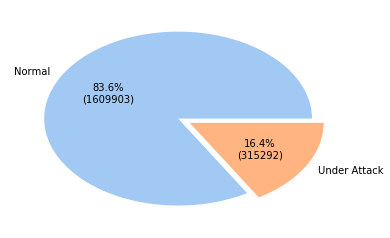

In [103]:
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
data = [freq[0], freq[1]]
keys = ['Normal', 'Under Attack']
  
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = seaborn.color_palette('pastel')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct=autopct_format(data))
  
# displaying chart
plt.show()

In [108]:
freq = df['label'].value_counts()
delete_frac = round((freq[0] - freq[1])/freq[0],4)
df = df.drop(df.query('label == 0').sample(frac= delete_frac).index)
df['label'].value_counts()

0    71155
1    69177
Name: label, dtype: int64

In [109]:
df.shape

(140332, 8)

In [110]:
df.head()

,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
11,1483,7256.0,436,420.0,0.01,mysqld,0,normal
17,2437,3292.0,0,0.0,0,window-stac-b,0,normal
96,2483,0.0,0,0.0,0,dbus-daemon,0,normal
142,3676,0.0,48,0.0,0.06,atop,0,normal
194,3155,0.0,0,0.0,0,gnome-terminal,0,normal


# Investigate variable types

# Investigating the correlation

In [113]:
X = df.iloc[:,1:5]

In [114]:
cormat = X.corr()
round(cormat,2)

,RDDSK,WCANCL
RDDSK,1.0,0.0
WCANCL,0.0,1.0


AttributeError: Unknown property pad

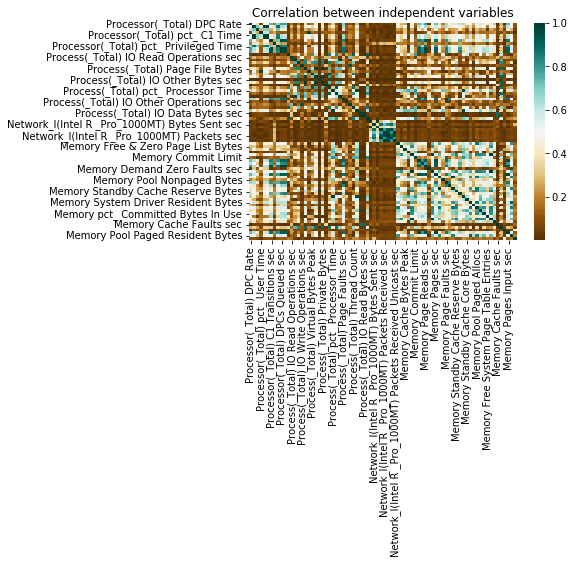

In [21]:
import seaborn as sns
mask = np.triu(np.ones_like(X.corr().abs(), dtype=np.bool))

heatmap = sns.heatmap(X.corr().abs(),annot=False,cmap='BrBG')
heatmap.set_title('Correlation between independent variables', fontdict={'fontsize':12}, pad=10);

In [22]:
# calculate the correlation matrix and reshape
df_corr = X.corr().abs().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
df_corr.head()

,FEATURE_1,FEATURE_2,CORRELATION
0,Processor(_Total) DPC Rate,Processor(_Total) DPC Rate,1.000000
1,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,0.510533
2,Processor(_Total) DPC Rate,Processor(_Total) pct_ Interrupt Time,0.361777
3,Processor(_Total) DPC Rate,Processor(_Total) pct_ User Time,0.070845
4,Processor(_Total) DPC Rate,Processor(_Total) pct_ C1 Time,0.498770


In [23]:
df_corr = df_corr[df_corr['FEATURE_1'] != df_corr['FEATURE_2']]

In [24]:
df_corr_perfect = df_corr[df_corr.CORRELATION == 1]

In [25]:
df_corr_perfect

,FEATURE_1,FEATURE_2,CORRELATION
1269,Process(_Total) Page File Bytes,Process(_Total) Private Bytes,1.0
1654,Process(_Total) Private Bytes,Process(_Total) Page File Bytes,1.0
3005,Network_I(Intel R _Pro_1000MT) Packets Sent Un...,Network_I(Intel R _Pro_1000MT) Packets Sent sec,1.0
3084,Network_I(Intel R _Pro_1000MT) Packets Receive...,Network_I(Intel R _Pro_1000MT) Packets Receive...,1.0
3236,Network_I(Intel R _Pro_1000MT) Packets Sent sec,Network_I(Intel R _Pro_1000MT) Packets Sent Un...,1.0
3315,Network_I(Intel R _Pro_1000MT) Packets Receive...,Network_I(Intel R _Pro_1000MT) Packets Receive...,1.0
3719,Memory Available Bytes,Memory Available KBytes,1.0
4181,Memory Available KBytes,Memory Available Bytes,1.0


In [26]:
# Relabel the row numbers
df_corr_perfect.reset_index(drop=True, inplace=True)

# Delete even rows
df_corr_perfect = df_corr_perfect[df_corr_perfect.index % 2 != 0]
df_corr_perfect


,FEATURE_1,FEATURE_2,CORRELATION
1,Process(_Total) Private Bytes,Process(_Total) Page File Bytes,1.0
3,Network_I(Intel R _Pro_1000MT) Packets Receive...,Network_I(Intel R _Pro_1000MT) Packets Receive...,1.0
5,Network_I(Intel R _Pro_1000MT) Packets Receive...,Network_I(Intel R _Pro_1000MT) Packets Receive...,1.0
7,Memory Available KBytes,Memory Available Bytes,1.0


In [27]:
lst1 = df_corr_perfect.FEATURE_1
remove_var = list(set(lst1))

In [28]:
df = df.drop(remove_var, axis=1)

In [29]:
df.shape

(11909, 76)

In [30]:
df.head()

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,Processor(_Total) pct_ Privileged Time,Processor(_Total) DPCs Queued sec,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
2,0,99.791667,0.000000,0.208333,99.178867,0.208333,65.999919,0.000000,0.000000,2.266664,...,419,27353088,0.133333,925319168,5849088,0.000000,48033792,0.000000,0,normal
7,0,100.000000,0.000000,0.000000,99.334475,0.000000,71.190052,0.000000,0.000000,7.865568,...,438,28143616,0.266629,893521920,5849088,0.000000,47931392,0.000000,0,normal
8,14,91.875000,0.729167,3.229167,88.883554,8.125000,161.050403,0.729167,4.895833,569.542484,...,411,26755072,1.466519,937791488,5849088,7.465913,48099328,6.199374,0,normal
15,0,100.000000,0.000000,0.000000,99.037370,0.000000,66.198140,0.000000,0.000000,2.933251,...,440,28794880,0.266659,911331328,5849088,0.000000,42684416,0.000000,0,normal
17,0,49.687500,0.416667,36.458333,47.297749,50.312500,239.262523,6.145833,13.854167,390.859897,...,370,54022144,916.784121,925970432,5849088,1140.980238,45043712,73.132067,0,normal


In [31]:
# Remove the multiple attack types column
df = df.drop('type', axis=1)

## Seperating independent and dependent variables:

In [32]:
# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables
# Keeping only Y
y = df.iloc [: , -1].values    # dependent variables

## Handling Inf values:


In [33]:
import numpy as np

# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]

## Standardizing all numerical columns 

In [34]:
# feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [35]:
df.shape

(11909, 75)

# Train test Split

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

# Supervised Model selection

In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [38]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [10,20,50],
            'kernel': ['rbf','poly','sigmoid','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [5,15,25],
            'criterion' : ['gini', 'entropy']
        }
    }
}

In [ ]:
import time
start = time.time()

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_output = pd.DataFrame(scores,columns=['model','best_score','best_params'])


end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
model_output

In [53]:
model_output.best_params[0]

{'C': 50, 'kernel': 'linear'}

In [58]:
svm= SVC(gamma='auto',C = 50,kernel = 'linear') 
svm.fit(X_train, y_train)
# Measure model performance
y_pred_svm = svm.predict(X_test)

In [61]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred_svm))
print('Test Precision: %.3f' % precision_score(y_test, y_pred_svm))
print('Test Recall: %.3f' % recall_score(y_test, y_pred_svm))
print('Test F-1: %.3f' % f1_score(y_test, y_pred_svm))

Test Accuracy: 0.968
Test Precision: 0.949
Test Recall: 0.990
Test F-1: 0.969


In [62]:
model_output.best_params[1]

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [63]:
forest=RandomForestClassifier( n_estimators= 100, max_depth=25, criterion='entropy',max_features = 'sqrt')
forest.fit(X_train, y_train)
# Measure model performance
y_pred_rf = forest.predict(X_test)

In [64]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))
print('Test Precision: %.3f' % precision_score(y_test, y_pred_rf))
print('Test Recall: %.3f' % recall_score(y_test, y_pred_rf))
print('Test F-1: %.3f' % f1_score(y_test, y_pred_rf))

Test Accuracy: 0.986
Test Precision: 0.974
Test Recall: 0.998
Test F-1: 0.986


Between the two supervised model random forest is the clear winner and the test accuracy is 98.6%.

In [68]:
# Random forest
forest.fit(X_train, y_train)
y_pred_prob_rf = forest.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

In [69]:
# SVM 
modelSVMlinear=svm.SVC(gamma='auto',C = 50,kernel = 'linear', probability=True)
modelSVMlinear.fit(X_train, y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

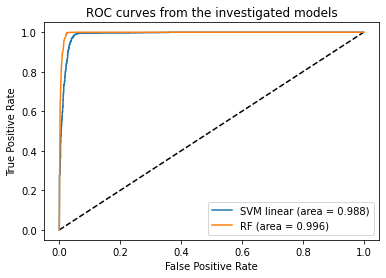

In [70]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

# Unsupervised modelling:

## SOM

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom
from sklearn.base import BaseEstimator, TransformerMixin

In [85]:
class MiniSomWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, som_shape=(1, 2), sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian'):
        self.som_shape = som_shape
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.neighborhood_function = neighborhood_function
        self.som = None

    def fit(self, X, y=None):
        self.som = MiniSom(self.som_shape[0], self.som_shape[1], X.shape[1],
                           sigma=self.sigma, learning_rate=self.learning_rate,
                           neighborhood_function=self.neighborhood_function)
        self.som.pca_weights_init(X)
        self.som.train_random(X, 100, verbose=False)
        return self

    def transform(self, X):
        return classify(self.som, X)

    def predict(self, X):
        return self.transform(X)

In [91]:
start = time.time()
# Define the parameter grid
param_grid = {
    'sigma': [1,2, 4, 6],
    'learning_rate': [.05,0.1, 0.5, 0.8],
    'neighborhood_function': ['gaussian', 'triangle']
}

# Create an instance of the MiniSomWrapper model
som = MiniSomWrapper(som_shape=(1, 2))

# Create a grid search object
grid_search = GridSearchCV(som, param_grid, scoring='accuracy', cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:01:31.28


In [92]:
# Print the best parameters and the corresponding classification report
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'neighborhood_function': 'gaussian', 'sigma': 1}


In [93]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test Precision: %.3f' % precision_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test Recall: %.3f' % recall_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test F-1: %.3f' % f1_score(y_test, classify(grid_search.best_estimator_.som, X_test)))

Test Accuracy: 0.826
Test Precision: 0.742
Test Recall: 1.000
Test F-1: 0.852


## K-means clustering 

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV



In [ ]:
start = time.time()

# Define the parameter grid
param_grid = {
    'n_init': [50, 100, 200],
    'init': ['k-means++', 'random'],
    'algorithm': ['auto', 'full', 'elkan']
}

# Create the KMeans instance
kmeans = KMeans(n_clusters = 2)

# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=10)

# Fit the data to perform grid search
grid_search.fit(X_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the data
best_model.fit(X_train)

# Predict the cluster labels
labels = best_model.predict(X_test)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, labels)
precision = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f_score = f1_score(y_test, labels, average='macro')

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F-score: ", f_score)

In [362]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics 


import warnings
warnings.filterwarnings('ignore')

In [363]:
def k_means_fit(covariates,centroid_method):
    data = pd.DataFrame(covariates)
    # from sklearn.cluster import KMeans 
    clusters = 2
    number_of_iteration = 100
    kmeans = KMeans(n_clusters = clusters,n_init= number_of_iteration,init = centroid_method,algorithm = "full") 
    kmeans.fit(data) 
    
    y_labels_test = kmeans.predict(X_test)
    tab = pd.crosstab(index=y_test, columns=y_labels_test)
    print (metrics.classification_report(y_test,y_labels_test))

In [364]:
k_means_fit(X_train,centroid_method = "random")

              precision    recall  f1-score   support

           0       0.24      0.31      0.27      2186
           1       0.00      0.00      0.00      2186

    accuracy                           0.16      4372
   macro avg       0.12      0.16      0.14      4372
weighted avg       0.12      0.16      0.14      4372



# Hierchical clustering 

In [365]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_test)
print (metrics.classification_report(y_test,cluster.labels_))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      2186
           1       0.74      0.88      0.81      2186

    accuracy                           0.79      4372
   macro avg       0.80      0.79      0.79      4372
weighted avg       0.80      0.79      0.79      4372



# Result

Among these three clustering methods K-means clustering giving us the best classification accuracy which is 84%.

In [366]:
y_train.shape

(17486,)

In [367]:
y_test.shape

(4372,)